# CA2 Project by Quah Ming Jun 2009621

## Sales Analysis of HDB resale prices using `numpy`, `pandas` and `matplotlib` package
---

- [x] **Text-Based Analysis**
- [x] **Visualization of Data**


## Objective: To find out if the HDB resale market is strong, and to see how much Mr Lee can sell his house for, given his housing data below.
---

**Background:** Imagine you are Mr Lee. He is a Singaporean who wants to sell his hdb in Singapore, because he thinks that resale housing price is on the rise. Recently, he read a [straits times article](https://www.straitstimes.com/singapore/housing/13-hdb-resale-flats-sold-for-at-least-1m-last-month) talking about how demand for housing has surged and prices of HDB resale has also increased, and he cannot wait to sell his flat. However, Mr Lee is skeptical about the claims and would like to analyse the existing data on HDB before making a decision.

Mr Lee's House Characteristics:

Town | flat_type | full_address | storey_range |  floor_area_sqm | flat_model | remaining_lease | Distance to MRT/LRT | Distance to Nearest Mall | Nearest Distance to Top Schools in Km
--------------|--------|----------------|---------|----|---------|----------|----------|----------|----------
Bukit Panjang | 4 Room | 123 PENDING RD | 04 - 06 | 80 | Model A | 79 Years | 0.159777 | 0.715694 | 0.475316 

### Analysis Objective:
- [x] **If the article was correct about the increasing demand for hdb resale flats**
- [x] **How variables affecting the price of the resale flat**
- [x] **His predicted price that he can sell his house for**


## Assumptions Made for Analysis:
---
- [x] **Data is Valid and accurate (No error in reporting)**
- [x] **Assuming $r^2$ as the quality of fit for the model's accuracy**
- [x] **We can extrapolate historical data for future prediction or forecast**

## Insights:
---

- [x] **Resale Prices are historically skewed (Figure 1)**
- [x] **Demand for HDB is on the rise, although resale prices are relatively stable (Figure 2 and Figure 3)**
- [x] **We see a possible indication of a reversal in economy for 2020 and maybe even further (Figure 4)**
- [x] **We also see 4 room flat having the highest demand as compared to the others (Figure 6)**
- [x] **We see a relationship between flat_type and resale price (Figure 5, Figure 7)**
- [x] **We established a moderate linear relation between floor_area and resale price (Figure 5, Figure 8)**
- [x] **With the model, we predicted Mr Lee's House should be around \$416,643 (Figure 5, Figure 9)**

## Conclusion:
---
- [x] **The article is right about the increased in demand, but possibly incorrect about the increase in price, given our data.**
- [x] **Mr Lee should price his house at around \$416,643 given the historical data we based our analysis on.**

## Data Sources Used:
---
### [HDB Resale](https://data.gov.sg/dataset/resale-flat-prices)
**Note:** This Dataset Contains infomation on past transactions on HDB resale, which could help us identify the following trends and characteristics which can be useful for future use. It catergorized information into many columns, which may be variables which can be impact the resale pricing of the property. This dataset is fairly large, as it carries information from April 2017 to 2020.

### [Inflation (CPI) Rate](https://data.gov.sg/dataset/consumer-price-index-monthly)
**Note:** Inflation Rate (CPI) is an economic indicator to explain the increase in prices over a given period of time. Though the effect on housing prices is limited, the inflation rate does affect the pricing of the house over time. This can be seen through houses back 10 years ago.

### [Gross Domestic Product](https://data.gov.sg/dataset/expenditure-on-gross-domestic-product-in-chained-2015-dollars-quarterly)
**Note:** The Gross Domestic Product (GDP) is also an economic indicator to explain the current economic conditions. Historically, GDP does affect the sale of house, and there have been correlation over time between sales of houses and GDP, as it essentially represents the state and condition of the economy as a whole.

### [Geolocation](https://www.kaggle.com/itsmestyj/singapore-hdb-property-information)
**Note:** This Dataset originally found at kaggle, although the link is now broken. Data was gathered using onemap api and it is to help extract possibly useful information and features that can impact the pricing of houses, so as to help find out if this features had been recently priced into the resale prices of housing.

## Retrieving the files

In [1]:
# Getting the Files
hdb_transac = "resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv"
file_gross_domestic_product = "expenditure-on-gross-domestic-product-in-chained-2015-dollars-quarterly.csv"
file_inflation = "consumer-price-index-2019-as-base-year-monthly.csv"
file_geolocation = "full_address_and_geocode.csv"

## Text-Based Analysis using `pandas`

In [2]:
# Importing the relavant packages
import pandas as pd
import numpy as np
import re

# Reading the hdb resale transaction file
file_hdb_raw = pd.read_csv(hdb_transac,sep=',')
print(f"File was located at: {hdb_transac}",end="\n\n")
print(f"There are {file_hdb_raw.shape[0]} rows and {file_hdb_raw.shape[1]} columns in this dataset",end="\n\n")
print(f"The dates in this dataset ranges from {file_hdb_raw.month.min()} to {file_hdb_raw.month.max()}",end="\n\n")
print(f"The columns in the dataset are namely:\n{','.join(file_hdb_raw.columns.values)}",end="\n\n")
print(f"Missing Values: \n{file_hdb_raw.isna().sum()}",end="\n\n")
print(file_hdb_raw.info(),end="\n\n")
print(f"The highest price sold was for {file_hdb_raw.resale_price.max()}, and details are:\n{file_hdb_raw.loc[file_hdb_raw.resale_price.idxmax()]}",end="\n\n")
print(f"The lowest price sold was for {file_hdb_raw.resale_price.min()}, and details are:\n{file_hdb_raw.loc[file_hdb_raw.resale_price.idxmin()]}",end="\n\n")
print(f"The mean resale price in the dataset from 2017 to 2020 is ${file_hdb_raw.resale_price.mean():.0f}",end="\n\n")
print(f"The median resale price in the dataset from 2017 to 2020 is ${file_hdb_raw.resale_price.median():.0f}",end="\n\n")
print("Correlation Matrix:\n")
print(file_hdb_raw.corr())
print("Desciptive Statistics:\n")
file_hdb_raw.describe()

File was located at: resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv

There are 87619 rows and 11 columns in this dataset

The dates in this dataset ranges from 2017-01 to 2020-12

The columns in the dataset are namely:
month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price

Missing Values: 
month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87619 entries, 0 to 87618
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                87619 non-null  object 
 1   town                 87619 non-null  object 
 2   flat_typ

,floor_area_sqm,lease_commence_date,resale_price
count,87619.000000,87619.000000,8.761900e+04
mean,97.715772,1994.321654,4.424812e+05
std,24.274292,12.987478,1.540613e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1984.000000,3.300000e+05
50%,95.000000,1995.000000,4.100000e+05
75%,113.000000,2003.000000,5.200000e+05
max,249.000000,2019.000000,1.258000e+06


In [3]:
# Importing the relavant packages
import pandas as pd
import numpy as np
import re

# Reading the cpi index file
file_cpi = pd.read_csv(file_inflation, sep=",")
print(f"File is located at: {file_inflation}",end="\n\n")
print(f"The columns in the following dataset are: {','.join(file_cpi.columns.values)}",end="\n\n")
print(f"The index for the datasets are {file_cpi.index}",end="\n\n")
print(f"The date ranges from {file_cpi.month.min()} to {file_cpi.month.max()}.", end="\n\n")
print(f"There are {file_cpi.shape[0]} rows and {file_cpi.shape[1]} columns in the following dataset", end="\n\n")
print(f"{file_cpi.info()}",end="\n\n")
print(f"The values dtypes in the file are:\n{file_cpi.dtypes}",end="\n\n")
print(f"The file looks like this:\n{file_cpi.head(5)}",end="\n\n")
print(f"The na values in this file are: {file_cpi[file_cpi.value.str.contains(r'na',regex=True,flags=re.IGNORECASE)].shape[0]}")
print(f"{100-file_cpi[file_cpi.value.str.contains(r'na',regex=True,flags=re.IGNORECASE)].shape[0]/file_cpi.shape[0]*100:.0f}% of the Data are valid for use",end="\n\n")
print(f"Missing Values after accounting for 'na':\n{file_cpi.loc[file_cpi.value.replace('na',np.NaN,regex=True).isna()].count()}")
file_cpi.describe()

File is located at: consumer-price-index-2019-as-base-year-monthly.csv

The columns in the following dataset are: month,level_1,value

The index for the datasets are RangeIndex(start=0, stop=2157, step=1)

The date ranges from 1961-01 to 2020-11.

There are 2157 rows and 3 columns in the following dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2157 entries, 0 to 2156
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   month    2157 non-null   object
 1   level_1  2157 non-null   object
 2   value    2157 non-null   object
dtypes: object(3)
memory usage: 50.7+ KB
None

The values dtypes in the file are:
month      object
level_1    object
value      object
dtype: object

The file looks like this:
     month                                            level_1   value
0  1961-01                                          All Items  24.542
1  1961-01  All Items Less Imputed Rentals On Owner-occupi...      na
2  1961-01    

,month,level_1,value
count,2157,2157,2157
unique,719,3,1101
top,1975-07,All Items Less Accommodation,na
freq,3,719,1032


In [4]:
# Importing the relavant packages
import pandas as pd
import numpy as np
import re

# Reading the Gross Domestic Product file
file_gdp = pd.read_csv(file_gross_domestic_product, sep=",").drop(columns=["level_1"])
print(f"Loading file located at: {file_gross_domestic_product}",end="\n\n")
print(f"There are {file_gdp.shape[0]} rows and {file_gdp.shape[1]} columns",end="\n\n")
print(f"The file dates ranges from {file_gdp.quarter.min()} to {file_gdp.quarter.max()}",end="\n\n")
print(f"The index in the datasets are namely, {file_gdp.index}",end="\n\n")
print(f"The columns in the datasets are namely, {', '.join(file_gdp.columns.values)}",end="\n\n")
file_gdp.info()
print()
print(f"Non Missing Values:\n{file_gdp.count()}",end="\n\n")
print(f"The mean gdp in the dataset from 1975 to 2019 is {file_gdp.mean().values[0]:.0f}",end="\n\n")
print(f"The median gdp in the dataset from 1975 to 2019 is {file_gdp.median().values[0]:.0f}",end="\n\n")
print(f"The file looks like this:\n{file_gdp.head(5)}",end="\n\n")
print(f"Descriptive Statistics:\n")
file_gdp.describe()

Loading file located at: expenditure-on-gross-domestic-product-in-chained-2015-dollars-quarterly.csv

There are 178 rows and 2 columns

The file dates ranges from 1975-Q1 to 2019-Q2

The index in the datasets are namely, RangeIndex(start=0, stop=178, step=1)

The columns in the datasets are namely, quarter, value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   quarter  178 non-null    object 
 1   value    178 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.9+ KB

Non Missing Values:
quarter    178
value      178
dtype: int64

The mean gdp in the dataset from 1975 to 2019 is 48007

The median gdp in the dataset from 1975 to 2019 is 41151

The file looks like this:
   quarter   value
0  1975-Q1  7379.1
1  1975-Q2  7576.3
2  1975-Q3  7973.2
3  1975-Q4  8147.6
4  1976-Q1  7984.8

Descriptive Statistics:



,value
count,178.000000
mean,48006.943820
std,34275.885989
min,7379.100000
25%,16534.675000
50%,41151.350000
75%,73969.000000
max,117887.900000


In [5]:
# Importing the relavant packages
import pandas as pd
import numpy as np
import re

# Reading the File Geolocation file
addresses = pd.read_csv(file_geolocation,sep=",",index_col=["full_address"])
print(f"File {file_geolocation} has been loaded",end="\n\n")
print(f"{addresses.info()}",end="\n\n")
print(f"There are {addresses.shape[0]} rows and {addresses.shape[1]} columns in the dataset", end="\n\n")
print(f"{addresses.index.nunique()/addresses.index.values.size*100:.0f}% of the index of the dataset are unique", end="\n\n")
print(f"Missing Values: \n{addresses.isna().sum()}",end="\n\n")
print(f"The index used in the dataset are:\n{','.join(addresses.head(5).index.values)} and more...",end="\n\n")
print(f"The columns used in the dataset are:\n{','.join(addresses.columns.values)}",end="\n\n")
addresses.describe()

File full_address_and_geocode.csv has been loaded

<class 'pandas.core.frame.DataFrame'>
Index: 9009 entries, 1 BEACH RD to 9B BOON TIONG RD
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   lat                                    8995 non-null   float64
 1   lng                                    8995 non-null   float64
 2   Distance to MRT/LRT                    8995 non-null   float64
 3   Distance to Nearest Mall               9009 non-null   float64
 4   Nearest Distance to Top Schools in Km  9009 non-null   float64
dtypes: float64(5)
memory usage: 422.3+ KB
None

There are 9009 rows and 5 columns in the dataset

100% of the index of the dataset are unique

Missing Values: 
lat                                      14
lng                                      14
Distance to MRT/LRT                      14
Distance to Nearest Mall                  0
Nearest Distan

,lat,lng,Distance to MRT/LRT,Distance to Nearest Mall,Nearest Distance to Top Schools in Km
count,8995.000000,8995.000000,8995.000000,9009.000000,9009.000000
mean,1.365977,103.841051,0.666153,0.709334,1.269206
std,0.041019,0.074746,0.419921,0.439696,1.065592
min,1.270435,103.685164,0.007052,0.008008,0.042085
25%,1.338849,103.773315,0.347080,0.379838,0.524109
50%,1.363155,103.846982,0.578195,0.620389,0.938919
75%,1.390529,103.900543,0.891239,0.930651,1.727201
max,1.457165,103.987874,3.487850,3.196024,5.240002


### Data Cleaning using `pandas` in-built functions (e.g. `fillna()`, `dropna()`, `interpolate()`, `astype()`)

In [6]:
# Importing the relavant packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Reading the hdb resale transaction file and cleaning up the data
file_hdb = pd.read_csv(hdb_transac,sep=',')
file_hdb = file_hdb.dropna().rename(columns={"month":"Date"})  # change columns headings to better names for easier understanding later
file_hdb["Date"] = file_hdb["Date"].values.astype("datetime64") # Convert data to datetime64 type for consistency

# Reading the cpi index file and cleaning up the data
file_cpi = pd.read_csv(file_inflation, sep=",")
file_cpi = file_cpi.loc[file_cpi["level_1"]=="All Items"].drop(columns="level_1")  # description is not needed
file_cpi.columns = ["Date","CPI"]  # change columns headings to better names for easier understanding later
file_cpi["CPI"] = file_cpi.CPI.map(lambda x: np.float64(x))  # float type for later comparison and calculations
file_cpi["Date"] = file_cpi["Date"].values.astype("datetime64")  # Convert data to datetime64 type for consistency

# Reading the address geolocation file and cleaning up the data
file_geo = addresses.copy()  # retrieving the updated dataframe of geolocation
file_geo.fillna(method='pad',inplace=True)  # we don't want to end up without data for the individual locations

# Reading the Gross Domestic Product file and cleaning up the data
file_gdp = pd.read_csv(file_gross_domestic_product, sep=",").drop(columns=["level_1"])  
file_gdp = file_gdp.rename(columns={"value":"GDP"})  # change columns headings to better names for easier understanding later
file_gdp["quarter"] = file_gdp["quarter"].astype("datetime64")  # Convert data to datetime64 type for consistency

# pd.merge is used because its clearer on the one to many relationships, as well as being able to specify multiple join keys if needed.
# Temporary CPI DataFrame for merging
CPI_test = pd.DataFrame(np.unique(file_hdb.Date.values),columns=["Date"]).sort_values(["Date"])
CPI_stor = pd.merge(CPI_test,file_cpi,how="outer",on="Date")  # we want the data for all dates
combined = pd.merge(CPI_stor,file_gdp,how="left", left_on="Date", right_on="quarter").drop(columns="quarter") # we want the data for all dates but we do not need quarter column anymore
# Interpolate missing data on assuming that method is linear
combined[["CPI","GDP"]] = combined[["CPI","GDP"]].pct_change().interpolate(method="linear").fillna(method="bfill")  # we want continuous data but not missing data as well for comparison later with resale prices

# Merging the Datasets and Removing the null values
copied = pd.merge(file_hdb,combined,how="left",on="Date")  # merge on left as we might have missing dates but we want to retain HDB information that may be valuable
copied["full_address"] = copied["block"]+" "+copied["street_name"]  # full address is the key to the geocode features HDB file
copied_test = pd.merge(copied,file_geo,how="inner",left_on='full_address',right_index=True)  # missing information about HDB in the geocode file should be removed now as we need complete information for meaningful comparison

# Recode the categories for later comparison with resale prices
copied_test["flat_type_cat"] = copied_test["flat_type"].astype("category").cat.codes  # [1 ROOM, 2 ROOM, 3 ROOM, 4 ROOM, 5 ROOM, EXECUTIVE, MULTI-GENERATION]  #
copied_test["flat_model_cat"] = copied_test["flat_model"].astype("category").cat.codes
copied_test["storey_range_cat"] = copied_test["storey_range"].astype("category").cat.codes
copied_test["town_type"] = copied_test["town"].astype("category").cat.codes

# Convert remaining lease to floats for later comparison with resale prices
copied_test_01 = copied_test.copy()
copied_test_01["remaining_lease"] = copied_test_01["remaining_lease"].astype(str).str.replace(" ","")  # Trim spaces
test_values = copied_test_01["remaining_lease"].str.extract(pat='(\d+)(years?)(\d+)?(months?)?',flags=re.IGNORECASE)  # capture using regex
test_values.drop(columns=[1,3],inplace=True)  # we only need digits 
test_values.fillna(value=0,inplace=True)  # fill na with 0 in the case of '0 months'
test_values = test_values.applymap(float)  # convert to float for continous data comparison
test_values[2] = test_values[2].values/12  # make data continous
copied_test["remaining_lease"] = test_values[0]+test_values[2]  # save the information in the main dataframe we are using

In [7]:
# Displaying Merged DataFrame
copied_test.set_index(["Date"],inplace=False)  # Display dataframe with date as index for aesthetics, but do not inplace the changes

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,...,full_address,lat,lng,Distance to MRT/LRT,Distance to Nearest Mall,Nearest Distance to Top Schools in Km,flat_type_cat,flat_model_cat,storey_range_cat,town_type
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61.333333,232000.0,...,406 ANG MO KIO AVE 10,1.362033,103.853827,1.001752,0.996966,1.113092,1,4,3,0
2017-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61.083333,235000.0,...,406 ANG MO KIO AVE 10,1.362033,103.853827,1.001752,0.996966,1.113092,1,4,3,0
2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60.166667,202000.0,...,406 ANG MO KIO AVE 10,1.362033,103.853827,1.001752,0.996966,1.113092,1,4,0,0
2018-03-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44.0,Improved,1979,60.166667,210000.0,...,406 ANG MO KIO AVE 10,1.362033,103.853827,1.001752,0.996966,1.113092,1,4,0,0
2018-05-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,07 TO 09,44.0,Improved,1979,60.083333,220000.0,...,406 ANG MO KIO AVE 10,1.362033,103.853827,1.001752,0.996966,1.113092,1,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01,JURONG WEST,3 ROOM,507,JURONG WEST ST 52,01 TO 03,74.0,Model A,1986,64.333333,305000.0,...,507 JURONG WEST ST 52,1.349200,103.718376,0.608657,1.604197,0.269835,2,7,0,13
2020-12-01,KALLANG/WHAMPOA,4 ROOM,41,CAMBRIDGE RD,01 TO 03,91.0,New Generation,1982,60.583333,550000.0,...,41 CAMBRIDGE RD,1.316109,103.850214,0.642304,0.702500,2.062548,3,11,0,14
2020-12-01,PASIR RIS,EXECUTIVE,449,PASIR RIS DR 6,01 TO 03,147.0,Maisonette,1989,67.916667,715000.0,...,449 PASIR RIS DR 6,1.370875,103.958369,1.037813,0.658270,0.530548,5,6,0,16


## Visual-Based Analysis using `matplotlib.pyplot` and `seaborn`

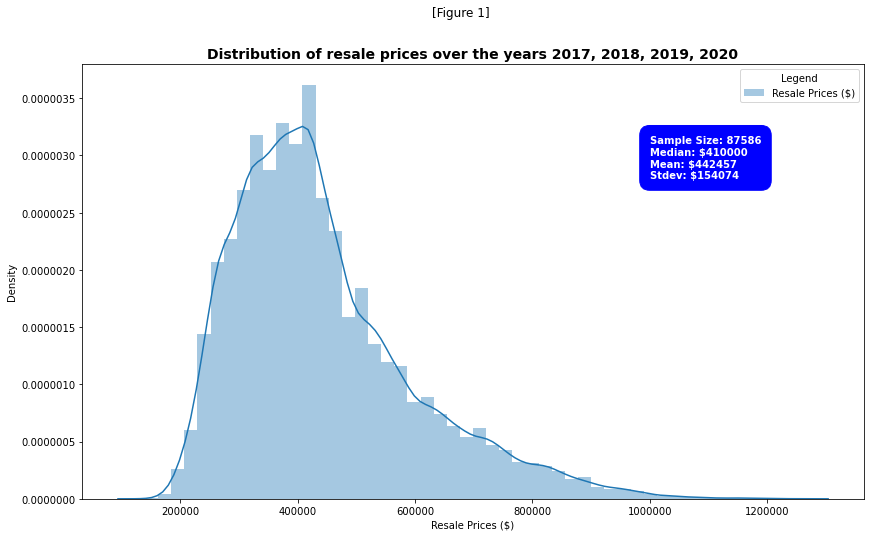


======================================================= Summary Results =======================================================

From this, we can see that the resale prices historically are negatively skewed, with a mean of $442457 and median of $410000.
The lowest 25% of resale prices is $330000, and the highest 25% being $520000
Judging from this, Mr Lee can expect to list his house around $410000 in order to find a buyer.


In [8]:
# %matplotlib widget
# Importing the relavant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the data
hist_data = copied_test["resale_price"].copy()

# Visualization
fig_hist, ax_hist = plt.subplots(1,1,figsize=(14,8))
sns.distplot(hist_data,label=["Resale Prices ($)"])
ax_hist.ticklabel_format(style="plain")  # Disable scientific notation

# Customization
fig_hist.suptitle("[Figure 1]")
ax_hist.set_title("Distribution of resale prices over the years 2017, 2018, 2019, 2020",fontdict={"fontsize":14,"fontweight":"bold"})
ax_hist.set_xlabel("Resale Prices ($)")
ax_hist.set_ylabel("Density")
ax_hist.legend(loc="upper right",title="Legend")
ax_hist.text(1000000,0.0000028,f"Sample Size: {len(hist_data)}\nMedian: ${hist_data.median():.0f}\nMean: ${hist_data.mean():.0f}\nStdev: ${hist_data.std():.0f}",
             color="white",fontweight="bold",bbox={'boxstyle':'round','color':'blue','alpha':1.0, 'pad':1.0})

plt.show()

# Summary Message
print(f'\033[1m')
print(f"{' Summary Results ':=^127}",end="\n\n")
print(f"From this, we can see that the resale prices historically are negatively skewed, with a mean of ${hist_data.mean():.0f} and median of ${hist_data.median():.0f}.")
print(f"The lowest 25% of resale prices is ${hist_data.describe()['25%']:.0f}, and the highest 25% being ${hist_data.describe()['75%']:.0f}")
print(f"Judging from this, Mr Lee can expect to list his house around ${hist_data.median():.0f} in order to find a buyer.")

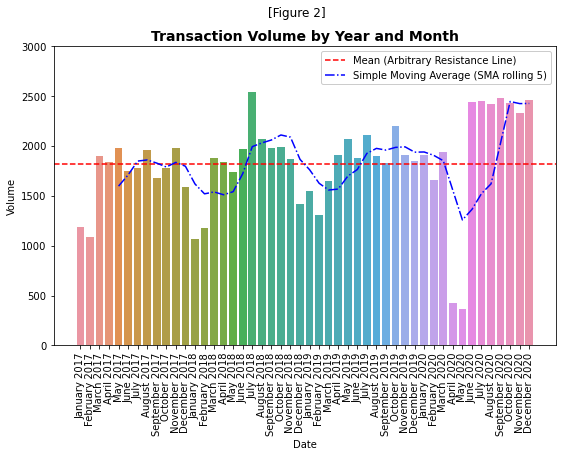


======================================================= Summary Results =======================================================

Null Hypothesis: Transaction Volume and demand is not increasing over time.
Alternative Hypothesis: Transaction Volume and demand is growing over time.

We see that over the years, the volume had weak momentum, with values reverting back to the mean frequently.
We can see that demand for housing dipped between April 2017 and May 2017 (Inclusive), possibly due to COVID-19
Afterwhich, we can see that the momentum experienced a surged, breaking though its resistance point (mean), possibly because of ease of lockdowns in Singapore.
Seeing how the momentum is now hovering above the mean, we can tell that the is an upwards trend for demand in resale HDB.
Therefore, the article was possibly right about the recent trend in demand for HDB resale housing.
Furthermore, with recent strong demand, Mr Lee's can probability sell his house if he needs to, due to increased l

In [9]:
# Importing the relavant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the Data
data_volume = copied_test.groupby([copied_test["Date"].dt.strftime("%B %Y")]).agg({"count"})["resale_price"].reset_index()
data_volume["sorting"] = data_volume.Date.astype("datetime64")
data_volume = data_volume.sort_values(by=["sorting"],ascending=True).drop(columns=["sorting"]).reset_index(drop=True)
sma = data_volume["count"].rolling(window=5).mean()  # get the simple moving average data

# Visualization
fig_volume, ax_volume = plt.subplots(1,1,figsize=(9,5.5))
barplot_volume = sns.barplot(x="Date",y="count",data=data_volume)
ax_volume.axhline(y=data_volume["count"].mean(),color="red",linestyle="--",label="Mean (Arbitrary Resistance Line)")
ax_volume.plot(sma,color="blue",linestyle="-.",label="Simple Moving Average (SMA rolling 5)")

# Customization
fig_volume.suptitle("[Figure 2]")
ax_volume.set_title("Transaction Volume by Year and Month",fontdict={"fontsize":14,"fontweight":"bold"})
ax_volume.set_xticks(np.arange(len(data_volume)))
ax_volume.set_xticklabels(data_volume["Date"],rotation=90)
ax_volume.set_ylabel("Volume")
ax_volume.set_ylim(0,3000)
ax_volume.legend(loc="upper right",framealpha=1.0,shadow=False)

plt.show()

# Summary Message
print(f'\033[1m')
print(f"{' Summary Results ':=^127}",end="\n\n")
print(f"Null Hypothesis: Transaction Volume and demand is not increasing over time.")
print(f"Alternative Hypothesis: Transaction Volume and demand is growing over time.",end="\n\n")
print(f"We see that over the years, the volume had weak momentum, with values reverting back to the mean frequently.")
print(f"We can see that demand for housing dipped between April 2017 and May 2017 (Inclusive), possibly due to COVID-19")
print(f"Afterwhich, we can see that the momentum experienced a surged, breaking though its resistance point (mean), possibly because of ease of lockdowns in Singapore.")
print(f"Seeing how the momentum is now hovering above the mean, we can tell that the is an upwards trend for demand in resale HDB.")
print(f"Therefore, the article was possibly right about the recent trend in demand for HDB resale housing.")
print(f"Furthermore, with recent strong demand, Mr Lee's can probability sell his house if he needs to, due to increased liquidity of resale HDB.")

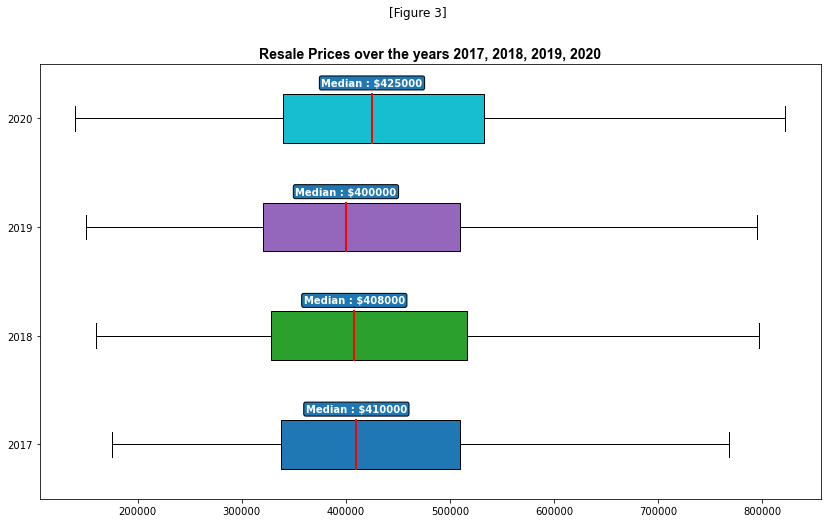


======================================================= Summary Results =======================================================

Null Hypothesis: Resale Prices has remained similar over time.
Alternative Hypothesis: Resale Prices did not remain similar over time.

As seen in the graph, the boxplots intervals are not significantly different, as most of their intervals are within the interval of others.
Although we see that the median price was the highest in 2020, it is not enough to show that there is a price increase among the years.
Therefore, we cannot prove that there is an increase in prices throughout the years to prove the article claims.
Hence, we cannot prove the null hypothesis wrong and the article may possibly be wrong, or that we are lacking in data to prove the claim.


In [10]:
# Importing the relavant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting the data and gather into the years
data_resale_yearly = copied_test.copy()  # copy the dataframe
data_resale_yearly["Year"] = data_resale_yearly["Date"].dt.strftime("%Y")  # extract the year
a = data_resale_yearly.pivot(columns="Year",values="resale_price")  # gather year into columns using pivot
b = [a[i].dropna().values for i in a.columns]  # individually drop nans and append it to a list for the various categories by columns

# Setting up the figures and Visualization
fig_box_resale, ax_box_resale = plt.subplots(1,1,figsize=(14,8))
fig_box_resale.suptitle("[Figure 3]")
colorings = ["tab:blue","tab:green","tab:purple","tab:cyan","tab:olive",'tab:pink','tab:grey',"tab:brown"]
bplot = ax_box_resale.boxplot(b,labels=np.unique(data_resale_yearly["Year"].values),vert=False,patch_artist=True,medianprops={'linewidth':2,'color':'red'},showfliers=False)  # plot the boxplot but disable 'noise' outliers
patch_colors = list(zip(bplot["boxes"],colorings))
ax_box_resale.set_title(f'Resale Prices over the years {", ".join(np.unique(data_resale_yearly["Year"].values))}',fontdict={"fontweight":"bold","fontsize":14,"fontname":"Arial"})

# Customizing the boxplot
for boxes, color in patch_colors:
    boxes.set_facecolor(color)
    
for lines in bplot["medians"]:
    xposition , yposition = lines.get_xydata()[0]
    ax_box_resale.text(xposition, yposition+0.55, f"Median : ${xposition:.0f}",fontweight="bold",verticalalignment="center",horizontalalignment="center",color="white",bbox={'boxstyle':'round','alpha':1.0,'pad':0.2})
    
plt.show()
    
# Summary Message
print(f'\033[1m')
print(f"{' Summary Results ':=^127}",end="\n\n")
print(f"Null Hypothesis: Resale Prices has remained similar over time.")
print(f"Alternative Hypothesis: Resale Prices did not remain similar over time.",end="\n\n")
print(f"As seen in the graph, the boxplots intervals are not significantly different, as most of their intervals are within the interval of others." )
print(f"Although we see that the median price was the highest in 2020, it is not enough to show that there is a price increase among the years.")
print(f"Therefore, we cannot prove that there is an increase in prices throughout the years to prove the article claims.")
print(f"Hence, we cannot prove the null hypothesis wrong and the article may possibly be wrong, or that we are lacking in data to prove the claim.")

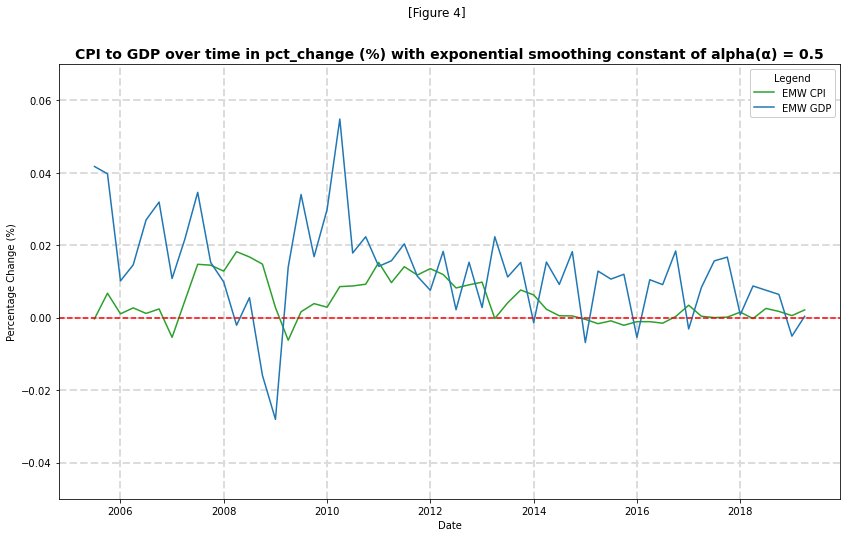


======================================================= Summary Results =======================================================

For this graph, we have used exponential moving average to smooth out the noice in the data for better comparison.
Judging from this, we can tell that the economy is slightly more volatitle than the CPI.
We can tell that both the economy and consumer spending have remained relatively stable throughout the years.
We can also tell that there is possibly dependence between the two dataset, given how everytime when GDP crosses the CPI line, CPI changes in the direction that GDP is trending towards.
With this, Mr Lee saw a downwards crossing of the lines in recent data, possibly signaling negative outlook in 2020, which was what happened later on, before slighlty signaling recovery as reported in media(not in this data).
Hence, Mr Lee should remain wary of possible downfalls in the economy, as this could lead to him not being able to sell his flat or being forced

In [11]:
# Importing the relavant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting Data
econs_data = pd.merge(file_cpi,file_gdp,how="inner",left_on=["Date"], right_on=["quarter"]).drop(columns=["quarter"]).set_index(["Date"],drop=True)
econs_data = econs_data[econs_data.index>"2005-01-01"]  # Filter to get more recent data for useful trend analysis
econs_data.sort_index(ascending=True,inplace=True)
econs_data = econs_data.pct_change()
sma_econs_data = econs_data.ewm(alpha=0.5).mean()  # get exponential moving average to smooth out 'noise' in the data for better comparison

# Visualization
fig_econs, ax_econs = plt.subplots(1,1,figsize=(14,8))
ax_econs.plot(sma_econs_data["CPI"], color="tab:green", label="EMW CPI")
ax_econs.plot(sma_econs_data["GDP"], color="tab:blue", label="EMW GDP")
ax_econs.axhline(y=0,color="red",linestyle="--")

# Customization
fig_econs.suptitle("[Figure 4]")
ax_econs.set_title("CPI to GDP over time in pct_change (%) with exponential smoothing constant of alpha(α) = 0.5",fontdict={"fontsize":14,"fontweight":"bold"})
ax_econs.set_xlabel("Date")
ax_econs.set_ylabel("Percentage Change (%)")
ax_econs.legend(loc="upper right",framealpha=1.0,shadow=False,title="Legend")
ax_econs.grid(color='gainsboro',linestyle='--',linewidth=2)
ax_econs.set_ylim(-0.05,0.07)
plt.show()

# Summary Message
print(f'\033[1m')
print(f"{' Summary Results ':=^127}",end="\n\n")
print(f"For this graph, we have used exponential moving average to smooth out the noice in the data for better comparison.")
print(f"Judging from this, we can tell that the economy is slightly more volatitle than the CPI.")
print(f"We can tell that both the economy and consumer spending have remained relatively stable throughout the years.")
print(f"We can also tell that there is possibly dependence between the two dataset, given how everytime when GDP crosses the CPI line, CPI changes in the direction that GDP is trending towards.")
print(f"With this, Mr Lee saw a downwards crossing of the lines in recent data, possibly signaling negative outlook in 2020, which was what happened later on, before slighlty signaling recovery as reported in media(not in this data).")
print(f"Hence, Mr Lee should remain wary of possible downfalls in the economy, as this could lead to him not being able to sell his flat or being forced to sell his flat at a lower price.")

In [12]:
# Importing the relavant packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# DataFrame to Store Statistical Tests
columns = ["Variable","Correlation","Coefficient of Determination","p-value","dtype"]
statistical_table = pd.DataFrame(columns=columns)
variables = copied_test.drop(columns=["lat","lng"],inplace=False).corr()["resale_price"].index.values

# Statistical Test
for variable in variables:
    reg_result = stats.linregress(x=copied_test[variable],y=copied_test["resale_price"])
    correlation, cod, p_value, dtype = reg_result.rvalue, reg_result.rvalue**2, reg_result.pvalue, copied_test[variable].dtype
    statistical_table = statistical_table.append(pd.Series([variable,abs(correlation),cod,p_value,dtype],index=columns),ignore_index=True)

# Get possibly linked features or variables that could affect house resale prices
statistical_table.sort_values(by=["Correlation"],ascending=False,inplace=True)
statistical_table = statistical_table.loc[statistical_table["p-value"]<0.05].reset_index(drop=True)
statistical_table

,Variable,Correlation,Coefficient of Determination,p-value,dtype
0,resale_price,1.000000,1.000000,0.000000e+00,float64
1,flat_type_cat,0.640226,0.409889,0.000000e+00,int8
2,floor_area_sqm,0.630430,0.397442,0.000000e+00,float64
3,storey_range_cat,0.370325,0.137141,0.000000e+00,int8
4,remaining_lease,0.331850,0.110124,0.000000e+00,float64
5,lease_commence_date,0.331690,0.110018,0.000000e+00,int64
6,flat_model_cat,0.264176,0.069789,0.000000e+00,int8
7,Distance to MRT/LRT,0.142399,0.020278,0.000000e+00,float64
8,Distance to Nearest Mall,0.137522,0.018912,0.000000e+00,float64
9,Nearest Distance to Top Schools in Km,0.067458,0.004551,7.213559e-89,float64


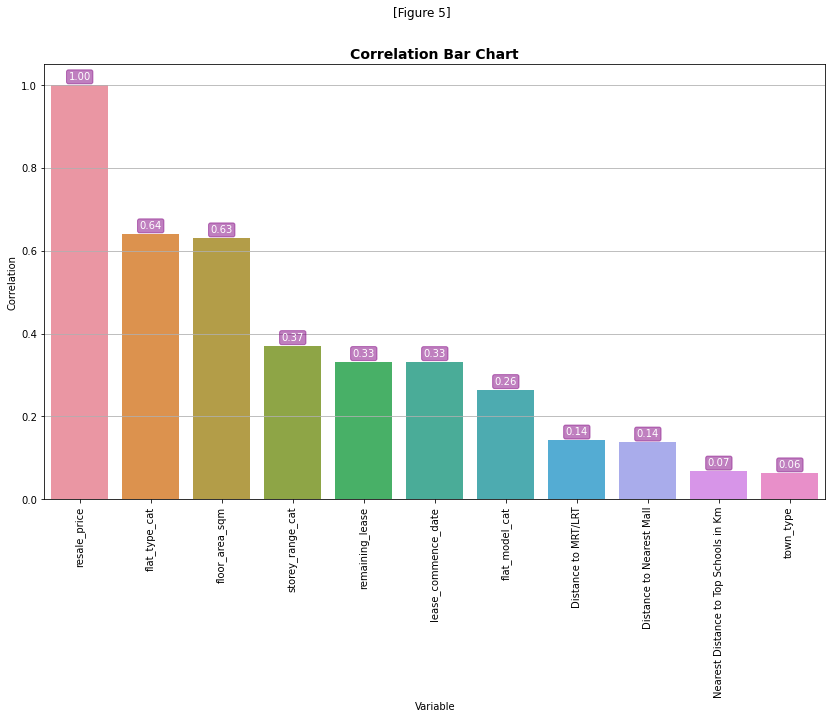


======================================================= Summary Results =======================================================

This chart shows correlation figures sorted by highest to lowest for each variable to resale prices.
This can help us remove redundant features that might not be needed for identifying relationships between the variable and resale prices and maybe even for building the model for prediction of resale prices.
From this, we can see that excluding resale prices, flat_type and floor_area, appears to have strong linear relationship with resale prices.
With this, Mr Lee can then use these variable and attempt to try confirm the relationship through various methods.


In [13]:
# Importing the relavant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization
fig_coor, ax_coor = plt.subplots(1,1,figsize=(14,8))
fig_coor.suptitle("[Figure 5]")
ax_coor.set_title("Correlation Bar Chart",fontdict={"fontsize":14,"fontweight":"bold"})
ax_coor.set_xlabel("Variables")
ax_coor.set_ylabel("Correlation")
x_labels = np.arange(len(statistical_table["Variable"]))
sns.barplot(x="Variable",y="Correlation",data=statistical_table)
ax_coor.set_xticks(x_labels)
ax_coor.set_xticklabels(statistical_table["Variable"],rotation=90)
ax_coor.grid(which="major",axis="y")  # for comparison and aesthetic

# Customization
for count, correlate_temp in enumerate(statistical_table["Correlation"]):
    ax_coor.text(count, correlate_temp+0.02, f"{correlate_temp:.2f}", horizontalalignment="center", verticalalignment="center",color='white', bbox={'boxstyle':'round','alpha':0.5,'pad':0.20,'color':'purple'})
    
plt.show()

# Summary Message
print(f'\033[1m')
print(f"{' Summary Results ':=^127}",end="\n\n")
print(f"This chart shows correlation figures sorted by highest to lowest for each variable to resale prices.")
print(f"This can help us remove redundant features that might not be needed for identifying relationships between the variable and resale prices and maybe even for building the model for prediction of resale prices.")
print(f"From this, we can see that excluding resale prices, flat_type and floor_area, appears to have strong linear relationship with resale prices.")
print(f"With this, Mr Lee can then use these variable and attempt to try confirm the relationship through various methods.")

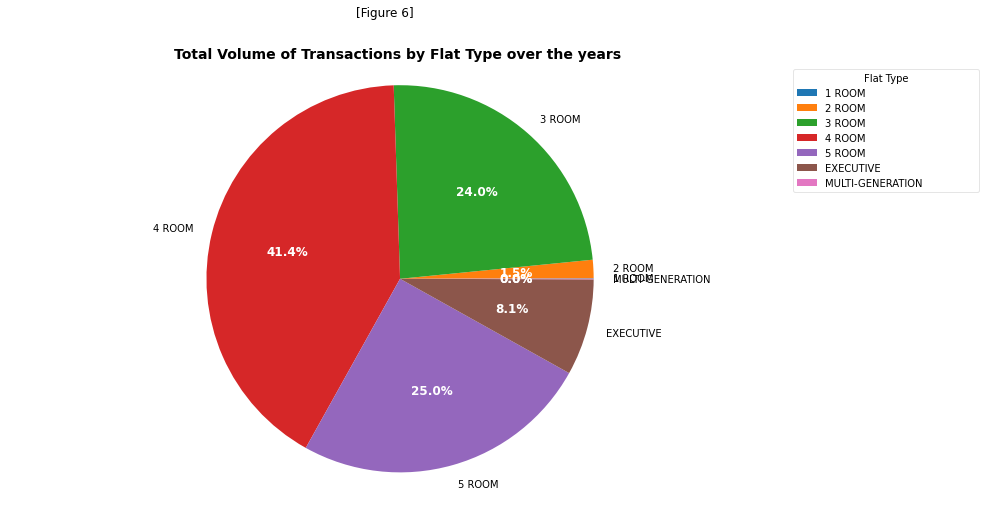


======================================================= Summary Results =======================================================

From the results, the demand for 4 room flat type appears to be the highest.
From this, Mr Lee can see that the 4 room flat has the highest proportion of about 41.4% volume of total transactions.
Therefore, Mr Lee can be more assured, given a higher chance that he can sell his flat, which is a 4 room, as compared to other flat types.


In [14]:
# Importing the relavant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting Data
data_pie = copied_test.groupby(["flat_type"]).count()["resale_price"]

# Visualization
fig_pie, ax_pie = plt.subplots(1,1,figsize=(14,8))
fig_pie.suptitle("[Figure 6]")
ax_pie.set_title("Total Volume of Transactions by Flat Type over the years",fontdict={"fontsize":14,"fontweight":"bold"})
wedge, text, auto_01 = ax_pie.pie(data_pie,labels=pd.unique(data_pie.index),autopct='%1.1f%%',textprops={'color':'white'})

# Customization
ax_pie.axis("Equal")
ax_pie.legend(loc="upper right",labels=pd.unique(data_pie.index),title="Flat Type",framealpha=0.5,shadow=False,bbox_to_anchor=(1,1,0.25,0),mode="expand")  # bbox_to_anchor=(left or right,height,close,height)
plt.setp(text,size=10,color="black")
plt.setp(auto_01,size=12,weight="bold")

plt.show()

# Summary Message
print(f'\033[1m')
print(f"{' Summary Results ':=^127}",end="\n\n")
print(f"From the results, the demand for 4 room flat type appears to be the highest.")
print(f"From this, Mr Lee can see that the 4 room flat has the highest proportion of about 41.4% volume of total transactions.")
print(f"Therefore, Mr Lee can be more assured, given a higher chance that he can sell his flat, which is a 4 room, as compared to other flat types.")

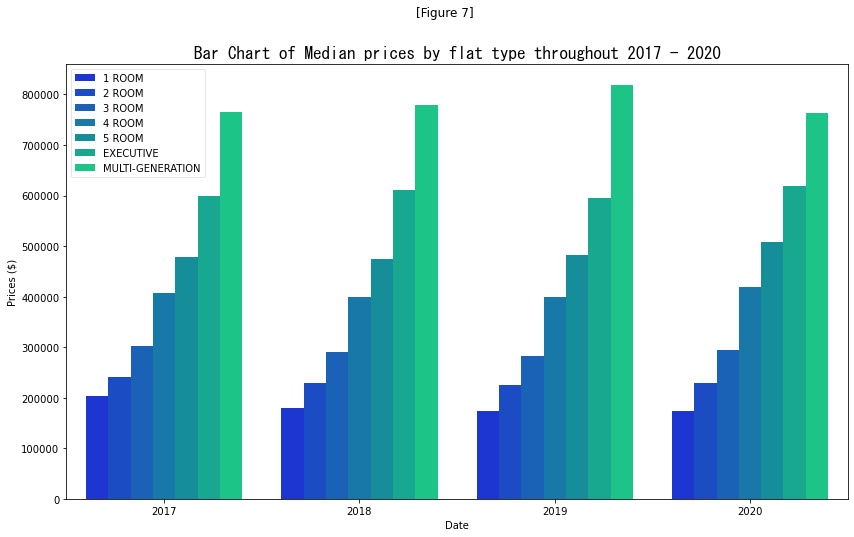


======================================================= Summary Results =======================================================

From this, we can tell that the flat type factor does, in fact, contribute to the price heavily.
We can almost see a linear relation between flat type of resale price.
Hence, there appears to be a linear relation between flat type and resale price, which can be taken into account in the model later.
We can also see that over the years, median prices for 4 room flat type has ranged around $400,000 and $450,000, and this is likely close to Mr Lee's house selling or predicted price.


In [15]:
# Importing the relavant packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting Data
data_bar = copied_test.groupby([copied_test["Date"].dt.strftime('%Y'),"flat_type"]).agg({"median"})["resale_price"]

# Visualization
fig2, ax2 = plt.subplots(1,1,figsize=(14,8))
data_bar.reset_index(inplace=True)
barp = sns.barplot(x="Date",y="median",hue="flat_type",data=data_bar,palette="winter")

# Customization
fig2.suptitle("[Figure 7]")
ax2.set_title("Bar Chart of Median prices by flat type throughout 2017 - 2020",fontdict={'fontsize':17,'fontname':'MS Gothic','fontweight':'bold'})
ax2.legend(loc="best", framealpha=0.5,shadow=False, prop={"size":10})
ax2.set_ylabel("Prices ($)")
plt.show()

# Summary Message
print(f'\033[1m')
print(f"{' Summary Results ':=^127}",end="\n\n")
print(f"From this, we can tell that the flat type factor does, in fact, contribute to the price heavily.")
print(f"We can almost see a linear relation between flat type of resale price.")
print(f"Hence, there appears to be a linear relation between flat type and resale price, which can be taken into account in the model later.")
print(f"We can also see that over the years, median prices for 4 room flat type has ranged around $400,000 and $450,000, and this is likely close to Mr Lee's house selling or predicted price.")

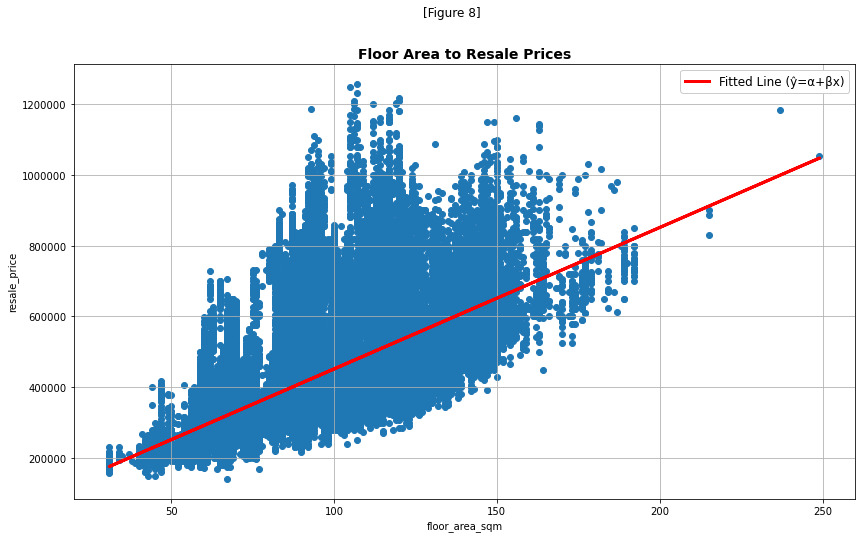


======================================================= Summary Results =======================================================

Null hypothesis: Floor Area do not affect resale prices
Alternative hypothesis: Floor Area lease affects resale prices
Correlation: 0.63, R^2 Coefficient of determination: 0.40, P-Value: 0.0

There appears to be a moderate linear relationship between floor area and resale price.
This means that the relationship of Floor Area and resale price only explains for 39.74% of the variation in the resale price data.
This means that there may be other factors influencing the variation in the data.
However, we can reject the null hypothesis that Floor Area does not affect resale prices, as the p-value is less than 0.05, meaning that it is statistically significant.
Hence, we can be 95% confident that we can reject the null hypothesis and it is possible for a linear relationship between floor area and resale price, which can be taken into account when building the mode

In [16]:
# predicted value (ŷ) = alpha(α) + beta(β)*x_value(𝑥)

# Importing the relavant packages
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Visualization
fig_sca, ax_sca = plt.subplots(1,1,figsize=(14,8))
fig_sca.suptitle("[Figure 8]")
ax_sca.scatter(copied_test["floor_area_sqm"],copied_test["resale_price"])

# Customization
ax_sca.set_title("Floor Area to Resale Prices",fontdict={"fontsize":14,"fontweight":"bold"})
ax_sca.set_xlabel("floor_area_sqm")
ax_sca.set_ylabel("resale_price")
ax_sca.ticklabel_format(style="plain")
ax_sca.grid(True)
reg_result = stats.linregress(x=copied_test["floor_area_sqm"],y=copied_test["resale_price"])
line_fit = reg_result.intercept + reg_result.slope*copied_test["floor_area_sqm"]
line_fitted = ax_sca.plot(copied_test["floor_area_sqm"], line_fit, 'r-',linewidth=3,label="Fitted Line (ŷ=α+βx)")
plt.legend(loc="upper right",framealpha=1.0, shadow=False, fontsize=12)
plt.show()

# Summary message
print(f'\033[1m')
print(f"{' Summary Results ':=^127}",end="\n\n")
print("Null hypothesis: Floor Area do not affect resale prices")
print("Alternative hypothesis: Floor Area lease affects resale prices")
print(f"Correlation: {reg_result.rvalue:.2f}, R^2 Coefficient of determination: {reg_result.rvalue**2:.2f}, P-Value: {reg_result.pvalue}",end="\n\n")
print(f"There appears to be a moderate linear relationship between floor area and resale price.")
print(f"This means that the relationship of Floor Area and resale price only explains for {(reg_result.rvalue**2)*100:.2f}% of the variation in the resale price data.")
print(f"This means that there may be other factors influencing the variation in the data.")
print(f"However, we can reject the null hypothesis that Floor Area does not affect resale prices, as the p-value is less than 0.05, meaning that it is statistically significant.")
print(f"Hence, we can be 95% confident that we can reject the null hypothesis and it is possible for a linear relationship between floor area and resale price, which can be taken into account when building the model later.")

## Simple Price Prediction using `sklearn` and `xgboost`

In [17]:
# Importing the relavant packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb

# Creating the DataFrame for Mr Lee's Housing Features
columns = ['Town', 'flat_type', 'full_address', 'storey_range', 'floor_area_sqm', 'flat_model', 'remaining_lease', 'Distance to MRT/LRT', 'Distance to Nearest Mall', 'Nearest Distance to Top Schools in Km']
temp_house_df = pd.DataFrame(['Bukit Panjang','4 Room','123 PENDING RD','04 - 06','80','Model A',79,0.159777,0.715694,0.475316]).T
temp_house_df.columns = columns

# Getting the regression variables (top 3 quantitative variables to fit the model to prevent overfitting through feature reduction)
temp_table = statistical_table.sort_values(by=["dtype","Correlation"],ascending=[False,False])
temp_con = temp_table.loc[temp_table["Variable"]!="resale_price"].head(3)

# 4 Room Flats with storey_range of 04-06
x_data = copied_test.loc[copied_test["flat_type"].str.contains("4 Room",flags=re.IGNORECASE)][temp_con["Variable"].values]
y_data = copied_test.loc[copied_test["flat_type"].str.contains("4 Room",flags=re.IGNORECASE)]["resale_price"]

# Splitting the datasets using train-split test from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.25, random_state=1)

In [18]:
# Model 1, linear regression ordinary least squares

# Importing the relavant packages
from sklearn.metrics import r2_score
import statsmodels.api as sm
import numpy as np

# Fitting the model
fitted_ols = sm.OLS(y_train,x_train).fit()

predictions_ols = fitted_ols.predict(x_test)
linear_scoring = r2_score(y_true=y_test,y_pred=predictions_ols)

# Summary results
print(f'\033[1m')
print(fitted_ols.summary(),end="\n\n")
print(f"Model Accuracy with test data: {linear_scoring*100:.2f}%")


                                 OLS Regression Results                                
Dep. Variable:           resale_price   R-squared (uncentered):                   0.940
Model:                            OLS   Adj. R-squared (uncentered):              0.940
Method:                 Least Squares   F-statistic:                          1.409e+05
Date:                Tue, 09 Feb 2021   Prob (F-statistic):                        0.00
Time:                        14:28:21   Log-Likelihood:                     -3.5443e+05
No. Observations:               27182   AIC:                                  7.089e+05
Df Residuals:                   27179   BIC:                                  7.089e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [19]:
# Model 2, gradient boosting for regression

# Importing the relavant packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import xgboost as xgb

# Fitting the model
model = xgb.XGBRegressor(objective ='reg:squarederror', max_depth=8)  # reduce mean squared error, and increase depth of tree
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
result = model.score(x_test, y_test)
r_squared = r2_score(y_true=y_test,y_pred=y_predict)
adjusted_r_squared = 1-(1-r_squared)*(len(x_test)-1)/(len(x_test)-x_test.shape[1]-1)

# Summary results
print(f'\033[1m')
print(f"Model Accuracy: {result*100:.2f}%")


Model Accuracy: 75.85%


In [20]:
# Importing the relavant packages
import pandas as pd

# Predict Mr Lee Housing Price
x_house = temp_house_df[temp_con["Variable"].values].astype(float)
y_prediction_house = model.predict(x_house)
temp_house_df["Predicted Price"] = round(y_prediction_house[0],0)

# Summary results
print(f'\033[1m')
print(f"{' Summary Results ':=^127}")
print(f"Therefore, we will use model two which had a higher accuracy score.({result*100:.2f}% v {linear_scoring*100:.2f}%)")
print(f"The model accuracy is: {result*100:.2f}%")
print(f"The r-squared value is: {r_squared:.2f}")
print(f"The adjusted r-squared value is {adjusted_r_squared:.2f}")
print(f"This means that the relationship between the x variables and resale price explains {r_squared*100:.2f}% of the variation in the data")
print(f"With a r^2 of {r_squared*100:.2f}%, the model is a good fit.")
print(f"Mr Lee predicted house listing price is: ${y_prediction_house[0]:.0f}")
print(f"\n\nTable 1 (Mr Lee's Flat):")

# Displaying new dataframe for Mr Lee's House
temp_house_df.melt().set_index(["variable"])


======================================================= Summary Results =======================================================
Therefore, we will use model two which had a higher accuracy score.(75.85% v 14.21%)
The model accuracy is: 75.85%
The r-squared value is: 0.76
The adjusted r-squared value is 0.76
This means that the relationship between the x variables and resale price explains 75.85% of the variation in the data
With a r^2 of 75.85%, the model is a good fit.
Mr Lee predicted house listing price is: $416643


Table 1 (Mr Lee's Flat):


,value
variable,
Town,Bukit Panjang
flat_type,4 Room
full_address,123 PENDING RD
storey_range,04 - 06
floor_area_sqm,80
flat_model,Model A
remaining_lease,79
Distance to MRT/LRT,0.159777
Distance to Nearest Mall,0.715694
